In [158]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams.update({'font.size': 22})
import sys

In [176]:
#Load and show catalog we're working with


#Comment and uncomment as needed



#for all time and along the day events:

#catalog = pd.read_csv('dets_MAD20.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])



#for monthly events:

#catalog = pd.read_csv('dets_MAD20_nov17.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_dec17.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_jan18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
catalog = pd.read_csv('dets_MAD20_feb18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_mar18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_apr18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_may18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_jun18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_jul18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_aug18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_sep18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_oct18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
#catalog = pd.read_csv('dets_MAD20_nov18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])


#kill negative magnitude detections

catalog = catalog[catalog['mag'] > 0]

catalog.head()

,No,date,time,lat,long,dep,mag,cc,mad,id
0,6,2018/02/01,10:38:27.200,17.14,-100.39,39.0,2.26,0.3801,27.09,2.018061e+13
1,11,2018/02/01,16:21:29.040,17.75,-101.35,58.0,2.85,0.5945,40.97,2.018021e+13
2,12,2018/02/01,16:29:47.260,17.44,-101.51,6.8,2.58,0.3197,23.04,2.018093e+13
3,13,2018/02/01,16:58:16.140,16.30,-100.88,16.0,2.98,0.6541,49.07,2.017121e+13
4,14,2018/02/01,17:30:20.300,16.30,-100.88,16.0,2.19,0.3556,26.67,2.017121e+13


In [177]:
#turn year month day into datetime objects to use in plot

#Comment and uncomment as needed

#for all time and monthly events:

catalog['datentime'] = catalog['date'] + ' ' + catalog['time']
catalog['datentime'] = pd.to_datetime(catalog['datentime'], format='%Y/%m/%d %H:%M:%S.%f')


#for along the day events:

#catalog['time'] = pd.to_datetime(catalog['time'], format='%H:%M:%S.%f')



catalog.head()

,No,date,time,lat,long,dep,mag,cc,mad,id,datentime
0,6,2018/02/01,10:38:27.200,17.14,-100.39,39.0,2.26,0.3801,27.09,2.018061e+13,2018-02-01 10:38:27.200
1,11,2018/02/01,16:21:29.040,17.75,-101.35,58.0,2.85,0.5945,40.97,2.018021e+13,2018-02-01 16:21:29.040
2,12,2018/02/01,16:29:47.260,17.44,-101.51,6.8,2.58,0.3197,23.04,2.018093e+13,2018-02-01 16:29:47.260
3,13,2018/02/01,16:58:16.140,16.30,-100.88,16.0,2.98,0.6541,49.07,2.017121e+13,2018-02-01 16:58:16.140
4,14,2018/02/01,17:30:20.300,16.30,-100.88,16.0,2.19,0.3556,26.67,2.017121e+13,2018-02-01 17:30:20.300


In [178]:
#create variables for date and magnitude of seismic events

#Comment and uncomment as needed


#for all time and monthly events:

d = list(catalog['datentime'])


#for along the day events:

#d = list(catalog['time'])



m = list(catalog['mag'])
m = [float(ma) for ma in m]
mkrsize = [int((float(ma)*20)) for ma in m]
#print(d,m)

#Verify same number of elements in both lists
print(len(mkrsize))
print(len(d))
print(len(m))

189
189
189


Text(0.5, 1.0, 'Magnitud de los sismos a través del tiempo (Febrero 2018)')

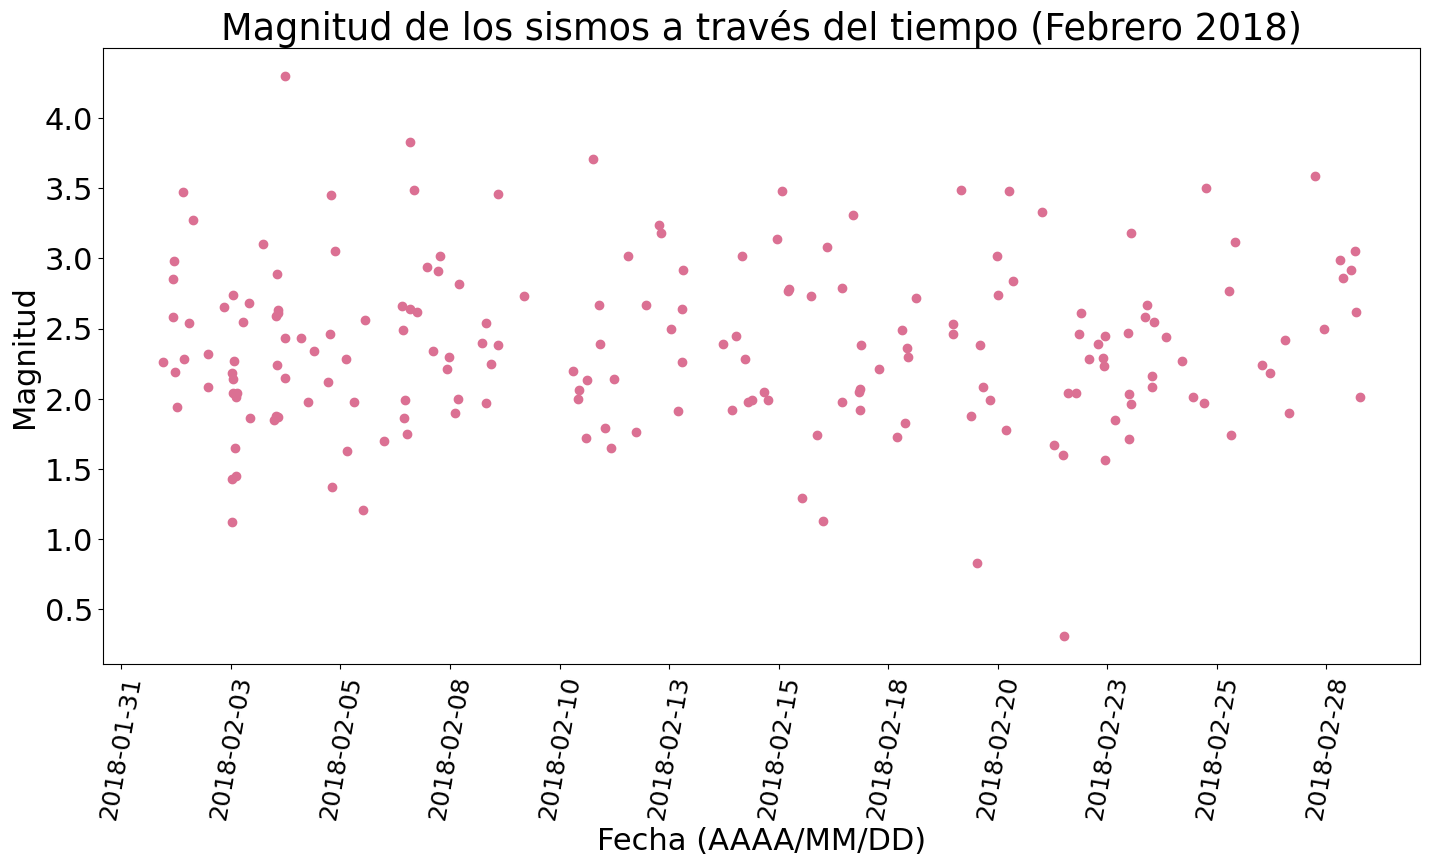

In [179]:
#plot date vs mag for events in catalog, as a simple scatter plot

#Comment and uncomment as needed


fig, ax = plt.subplots(figsize=(17,8))
plt.scatter(d, m, color='palevioletred')



#for all time and monthly detections

plt.xlabel('Fecha (AAAA/MM/DD)')



#for along the day detections

#plt.xlabel('Hora (HH:MM:SS)')



plt.ylabel('Magnitud')
plt.xticks(rotation=80)
plt.rcParams['xtick.labelsize'] = 18


#for all time and monthly detections

ax.xaxis.set_major_locator(plt.MaxNLocator(14))


#for along the day detections

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

#for all time events:

#plt.title('Magnitud de los sismos a través del tiempo (Nov 2017- Nov 2018)')


#for monthly events:

#plt.title('Magnitud de los sismos a través del tiempo ( 21 Nov 2017 - 30 Nov 2017)')
#plt.title('Magnitud de los sismos a través del tiempo (Diciembre 2017)')
#plt.title('Magnitud de los sismos a través del tiempo (Enero 2018)')
plt.title('Magnitud de los sismos a través del tiempo (Febrero 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Marzo 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Abril 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Mayo 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Junio 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Julio 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Agosto 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Septiembre 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Octubre 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Noviembre 2018)')


#for along the day events:

#plt.title('Magnitud de los sismos a través del tiempo (00:00 - 23:59 hrs)')



Text(0.5, 1.0, 'Magnitud de los sismos a través del tiempo (Febrero 2018)')

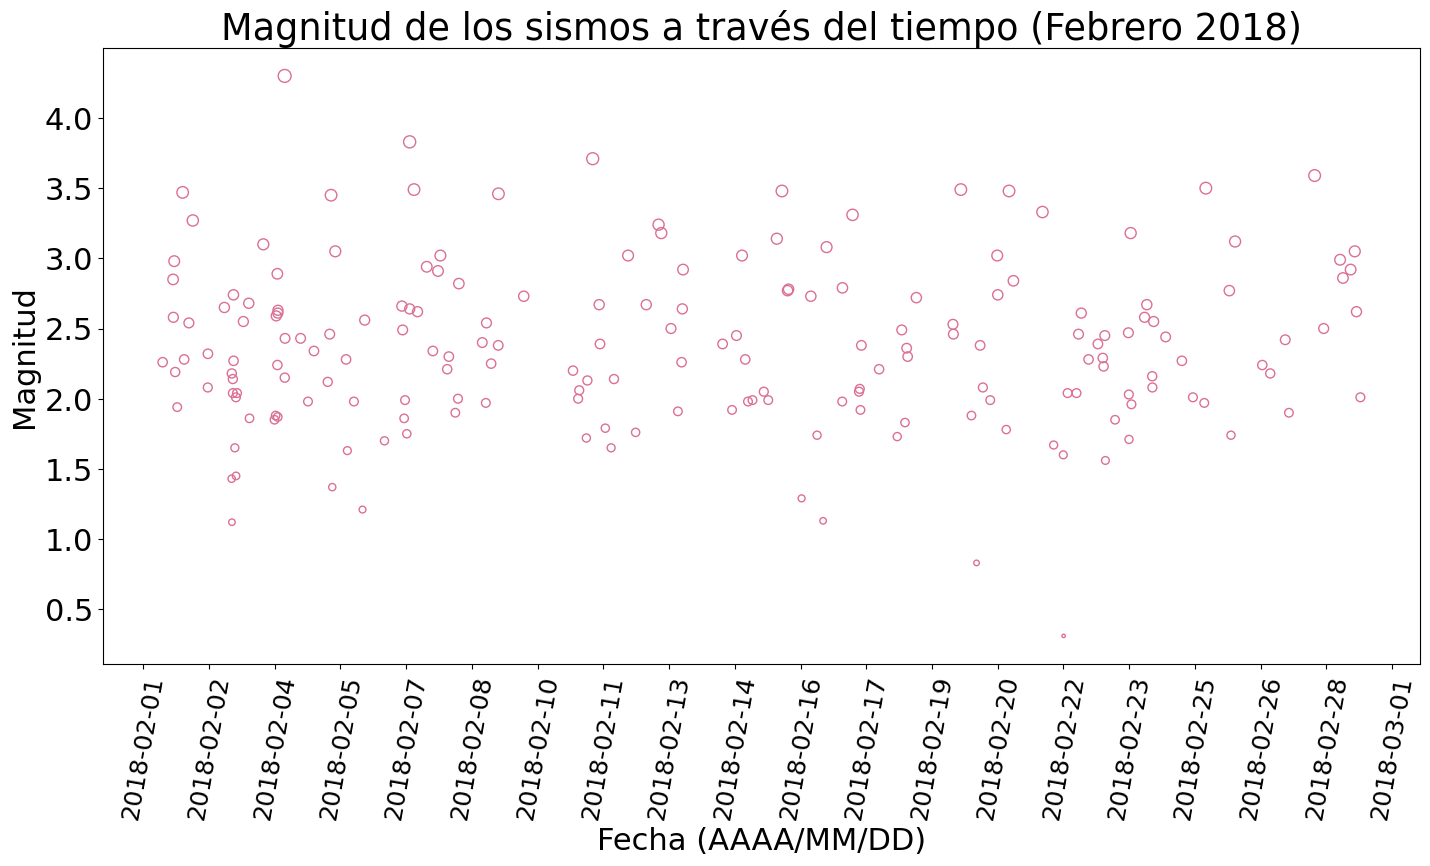

In [180]:
#plot date vs mag for events in catalog, changing size by magnitude parameter

#Comment and uncomment as needed


fig, ax = plt.subplots(figsize=(17,8))
plt.scatter(d, m, s=mkrsize, facecolors='None', edgecolors='palevioletred')

#for all time and monthly detections

plt.xlabel('Fecha (AAAA/MM/DD)')


#for along the day detections

#plt.xlabel('Hora (HH:MM:SS)')


plt.ylabel('Magnitud')
plt.xticks(rotation=80)
plt.rcParams['xtick.labelsize'] = 18


#for all time and monthly detections

ax.xaxis.set_major_locator(plt.MaxNLocator(24))


#for along the day detections

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

#for all time events:

#plt.title('Magnitud de los sismos a través del tiempo (Nov 2017- Nov 2018)')


#for monthly events:

#plt.title('Magnitud de los sismos a través del tiempo ( 21 Nov 2017 - 30 Nov 2017)')
#plt.title('Magnitud de los sismos a través del tiempo (Diciembre 2017)')
#plt.title('Magnitud de los sismos a través del tiempo (Enero 2018)')
plt.title('Magnitud de los sismos a través del tiempo (Febrero 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Marzo 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Abril 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Mayo 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Junio 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Julio 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Agosto 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Septiembre 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Octubre 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Noviembre 2018)')


#for along the day events:

#plt.title('Magnitud de los sismos a través del tiempo (00:00 - 23:59 hrs)')


In [181]:
#Select events greater than 4.0 to plot individually 

greaterevents = catalog[catalog['mag'] > 4.0]

greaterevents.head()


#for all time and monthly events:

dg = list(greaterevents['datentime'])


#for along the day events: 


#dg = list(greaterevents['time'])


g = list(greaterevents['mag'])
g = [float(ge) for ge in g]

print(len(dg))
print(len(g))
if len(dg)==0:
    print('No need to run next cell. No events larger than 4.0')

1
1


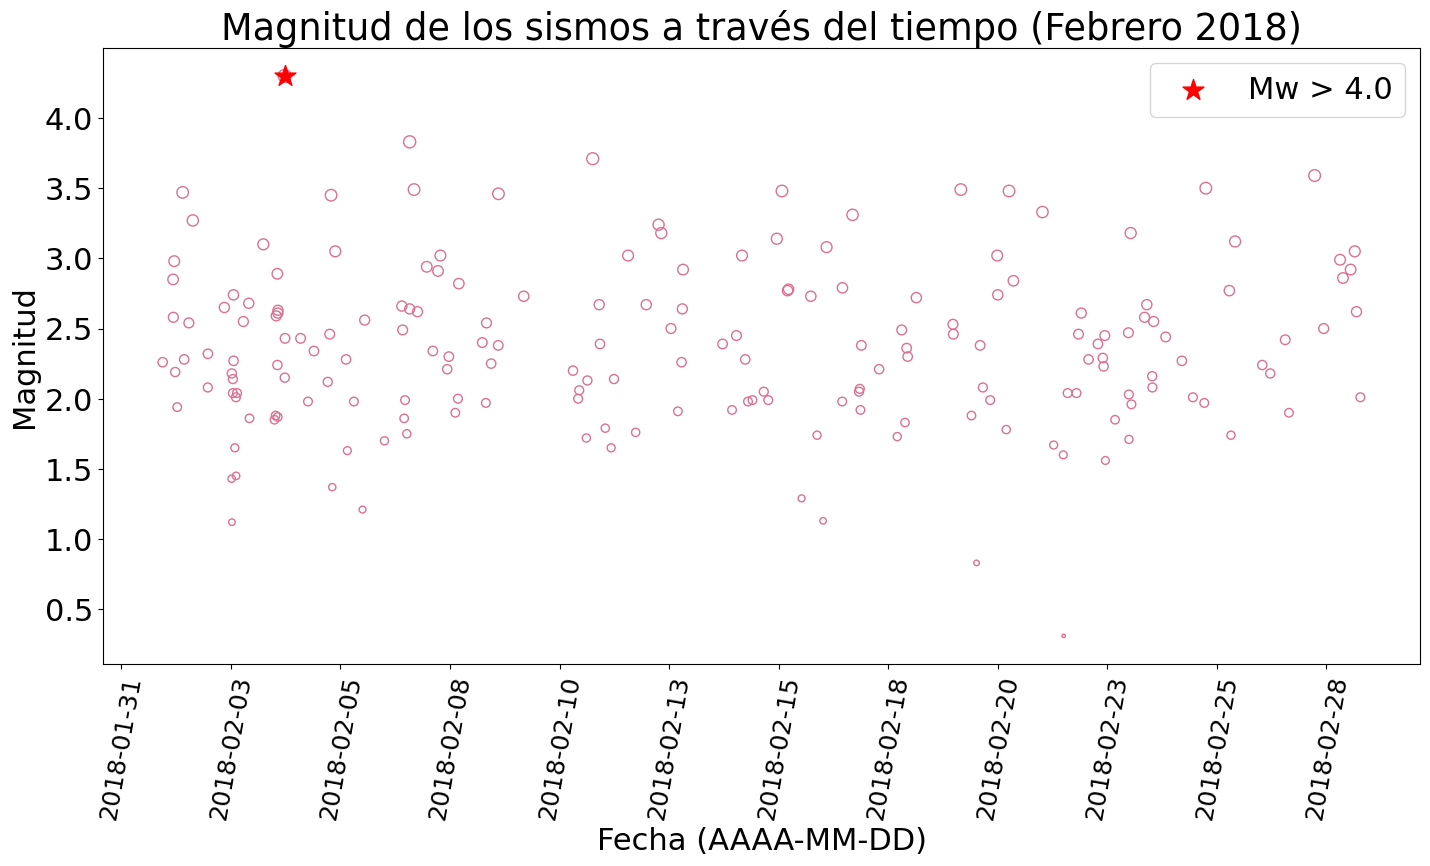

In [182]:
#plot date vs mag for events in catalog, by event magnitude, marking events greater than 4.0 with a red star

fig, ax = plt.subplots(figsize=(17,8))
plt.scatter(d, m, s=mkrsize, facecolors='None', edgecolors='palevioletred')
plt.scatter(dg, g, s=250, marker='*', color='r', label='Mw > 4.0')

#for all time and monthly events:

plt.xlabel('Fecha (AAAA-MM-DD)')


#for along the day events:

#plt.xlabel('Hora (HH:MM:SS)')

plt.ylabel('Magnitud')
plt.xticks(rotation=80)
plt.rcParams['xtick.labelsize'] = 18


#for all time and monthly events:

ax.xaxis.set_major_locator(plt.MaxNLocator(14))


#for along the day events:

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))


#for all time events:

#plt.title('Magnitud de los sismos a través del tiempo (Nov 2017- Nov 2018)')


#for monthly events:

#plt.title('Magnitud de los sismos a través del tiempo ( 21 Nov 2017 - 30 Nov 2017)')
#plt.title('Magnitud de los sismos a través del tiempo (Diciembre 2017)')
#plt.title('Magnitud de los sismos a través del tiempo (Enero 2018)')
plt.title('Magnitud de los sismos a través del tiempo (Febrero 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Marzo 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Abril 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Mayo 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Julio 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Agosto 2018)')
#plt.title('Magnitud de los sismos a través del tiempo (Noviembre 2018)')

#for along the day events:

#plt.title('Magnitud de los sismos a través del tiempo (00:00 - 23:59 hrs)')

plt.legend()
